<a href="https://colab.research.google.com/github/varshiniece/Technohacks-Internship-tasks/blob/main/HeartDiseasePrediction_Technohacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Task 7 : Heart Disease Prediction

##Use a dataset containing medical data of patients to predict if a person has heart disease or not.
##Dataset downloaded from UCI repository - Link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease 
##This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  
 #14 attributes used are:
      #1.(age),(sex), (cp), (trestbps),(chol), (fbs) ,(restecg)   ,(thalach) ,(exang), (oldpeak) ,(slope) , (ca) , (thal) ,(num) (the predicted attribute)
##num: diagnosis of heart disease (angiographic disease status)
##-- Value 0: < 50% diameter narrowing : No heart disease 
##-- Value 1: > 50% diameter narrowing  : Yes(Presence of heart disease)
##(in any major vessel: attributes 59 through 68 are vessels)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
#Reading the Data from CSV file


from google.colab import files
 
 
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (1).csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['heart_disease_uci.csv']))
print(df)

     age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
916   62    Male   typical angina       NaN  139.0  False  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
918   58    Male     asymptomatic       NaN  385.0   True    lv hypertrophy   
919   62    Male  atypical angina     120.0  254.0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca      

In [ ]:
df.shape

(920, 14)

Data Analysis /Data Cleaning 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df.num.unique() ## num can be only 0 and 1 . so make values >1 also as 1 

array([0, 2, 1, 3, 4])

In [ ]:
df.loc[df["num"] == 2,"num"]=1
df.loc[df["num"] ==3,"num"]=1
df.loc[df["num"] ==4,"num"]=1

In [ ]:
df.num.unique()

array([0, 1])

<ipython-input-51-f29605b28f58>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


Text(0.5, 1.0, 'Correlation map')

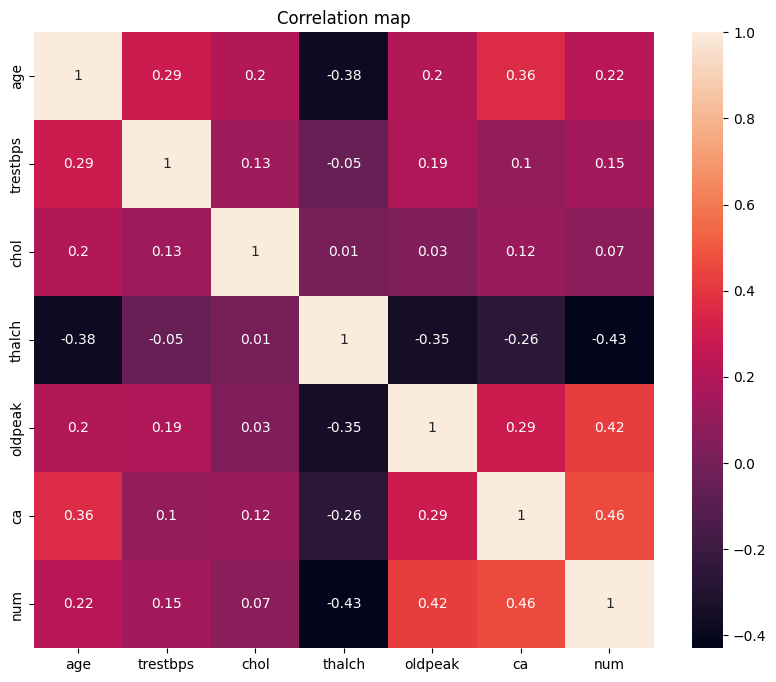

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr=df.corr()
plot=sns.heatmap(corr.round(2),annot=True)
plot.set_title("Correlation map")

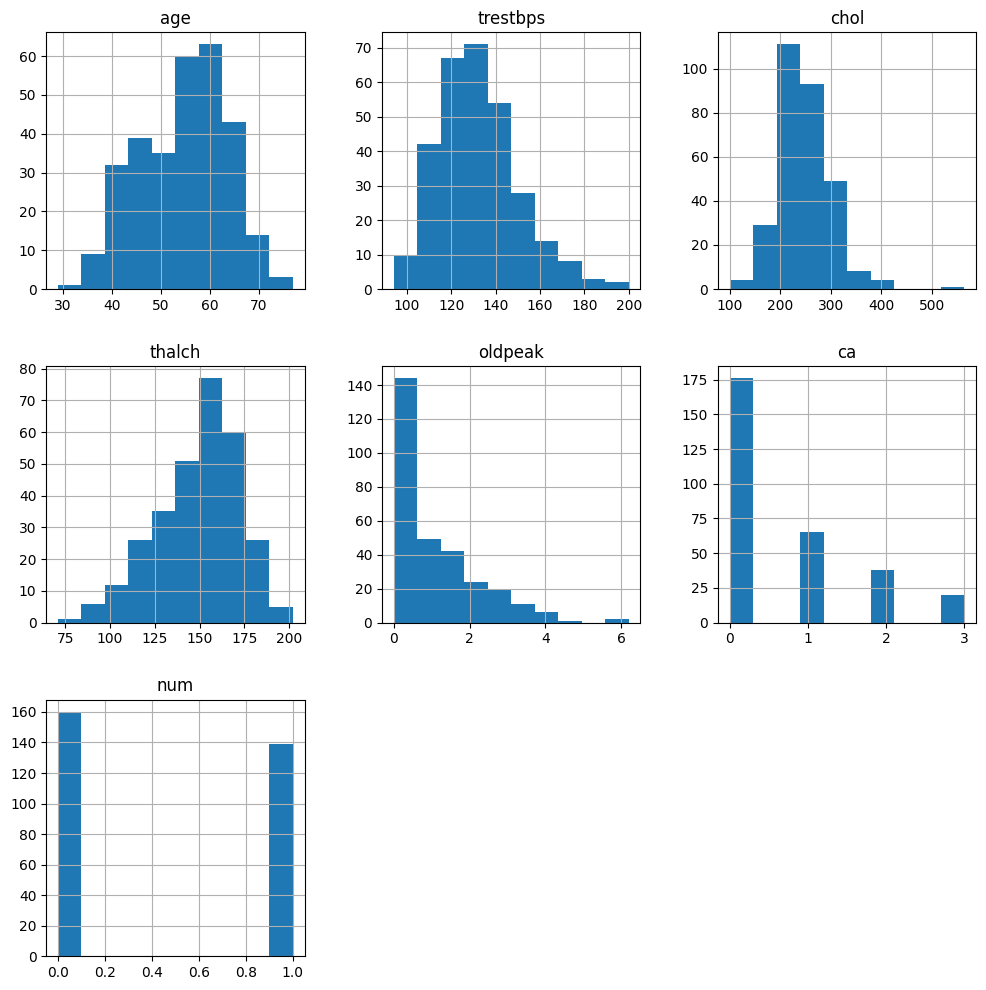

In [ ]:

df.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [ ]:
##Assigning input and output variables
x=df.drop("num",axis=1)
y=df.num
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
x.sex=le.fit_transform(x.sex)
x.cp=le.fit_transform(x.cp)
x.fbs=le.fit_transform(x.fbs)
x.restecg=le.fit_transform(x.restecg)
x.exang=le.fit_transform(x.exang)
x.slope=le.fit_transform(x.slope)
x.thal=le.fit_transform(x.thal)
x.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1


Text(0.5, 1.0, 'Correlation map')

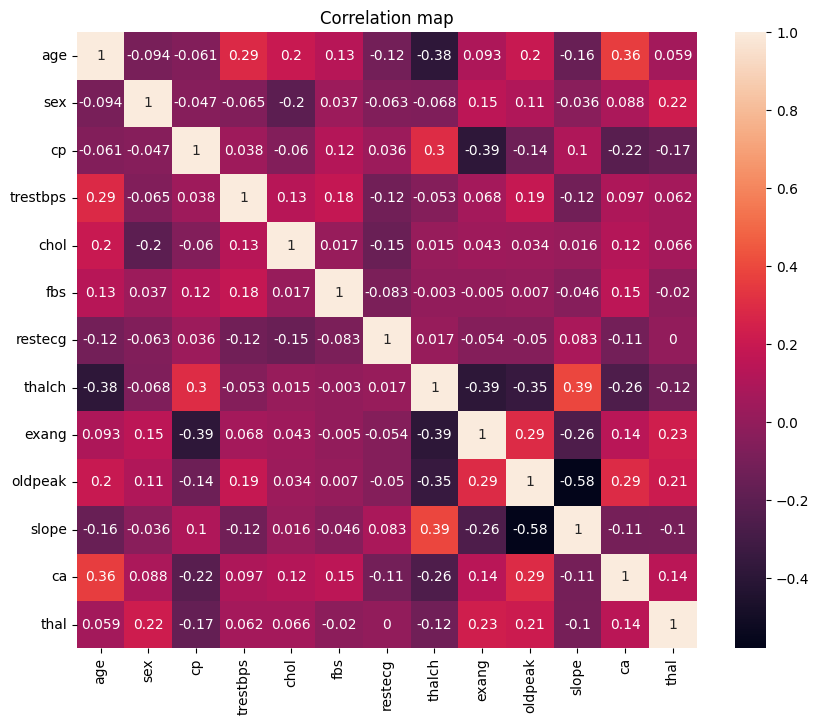

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr=x.corr()
plot=sns.heatmap(corr.round(3),annot=True)
plot.set_title("Correlation map")


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=40)

Testing Accuracy for Decision Tree: 0.88
Testing Sensitivity for Decision Tree: 0.825
Testing Specificity for Decision Tree: 0.9428571428571428
Testing Precision for Decision Tree: 0.9428571428571428


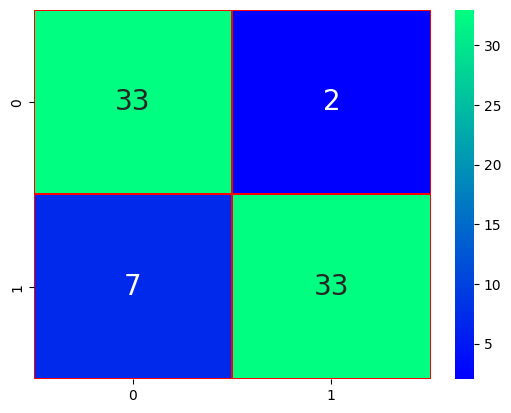

In [ ]:
##Decision Tree (Algo-1)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='red',annot_kws={"size": 20})

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.94      0.82      0.88        40

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



ACCURACY FOR DECISION TREE CLASSIFIER IS 88% 

82.67
Testing Accuracy for Random Forest: 0.8266666666666667
Testing Sensitivity for Random Forest: 0.7894736842105263
Testing Specificity for Random Forest: 0.8648648648648649
Testing Precision for Random Forest: 0.8571428571428571


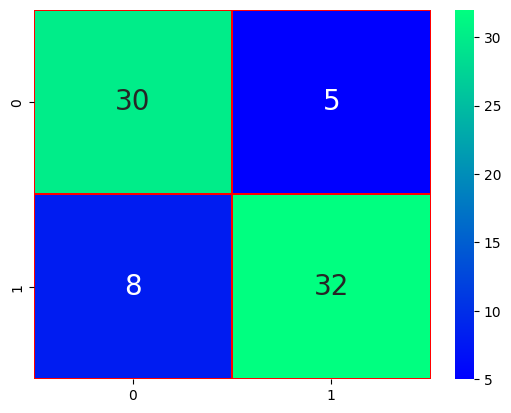

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model2 = rfc.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
cm2=confusion_matrix(y_test, prediction2)
sns.heatmap(cm2, annot=True,cmap='winter',linewidths=0.3, linecolor='red',annot_kws={"size": 20})
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]
print(round(accuracy_score(prediction2,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.86      0.80      0.83        40

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



ACCURACY OF RANDOM FOREST CLASSIFIER IS 83%

Testing Accuracy for SVM: 0.84
Testing Sensitivity for SVM: 0.8108108108108109
Testing Specificity for SVM: 0.868421052631579
Testing Precision for SVM: 0.8571428571428571


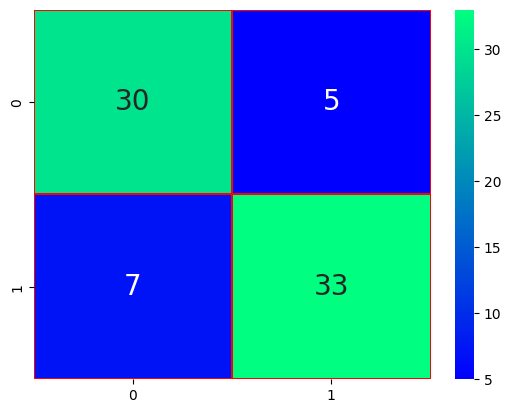

In [ ]:
##Algo-3 
##SVM- Support Vector machines 
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model3=svm.fit(X_train,y_train)
prediction3=model3.predict(X_test)
cm3= confusion_matrix(y_test,prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='red',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.87      0.82      0.85        40

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



ACCURACY OF SUPPORT VECTOR MACHINE IS 84%

Of all the three algorithms(Decision tree, Random forest and SVM) , Decision tree gives the best prediction (accuracy score being 88%) .hence using this model lets predict if the person has heart disease or not for an input data . 


In [ ]:
import numpy as np
input=(63,0,2,233,150,1,0,316,8,9,2,3.8,2)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal, No heart diseases:)")

The patient seems to be Normal, No heart diseases:)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
